# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "71d4e9c405acc3f595ff62eaf96806127d921292"
connection.set_access_token(API_TOKEN)

Access token is valid.


# Strategy Creation

## Import Strategy from pyaglostrategypool

In [ ]:
! wget -O reverse_rsi_crossover.py https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/reverse_rsi_crossover/_strategy.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' reverse_rsi_crossover.py

In [5]:
from reverse_rsi_crossover import ReverseRSICrossover as strategy_cls

In [6]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 134225,
 'strategyId': '961da4429c93499abdcff2e1c35583f4'}

In [7]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [8]:
instrument = connection.search_instrument('AXISBANK', exchange='NSE')
instrument

[{'id': 16, 'value': 'NSE:AXISBANK'},
 {'id': 1672340, 'value': 'NSE:AXISBANK.AF'},
 {'id': 1672491, 'value': 'NSE:AXISBANK.BL'},
 {'id': 2316339, 'value': 'NSE:AXISBANK.L1'},
 {'id': 2040740, 'value': 'NSE:AXISBANK.R1'},
 {'id': 2040739, 'value': 'NSE:AXISBANK.V1'},
 {'id': 2726920, 'value': 'NSE:AXISBANK26OCT231000CE'},
 {'id': 2726921, 'value': 'NSE:AXISBANK26OCT231000PE'},
 {'id': 2726922, 'value': 'NSE:AXISBANK26OCT231010CE'},
 {'id': 2726923, 'value': 'NSE:AXISBANK26OCT231010PE'}]

## Setup Parameters

In [9]:
parameters = {
  'TIME_PERIOD': 10,
  'OVERBOUGHT_VALUE': 65,
    'OVERSOLD_VALUE': 35
}

In [10]:
initial_virtual_funds = 7000     # in Rupees

## Backtesting

### Start

In [11]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 +0530', 
    end='2023-07-31 15:30 +0530', 
    instrument='NSE:AXISBANK', 
    lots=3,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds

)


Starting the strategy 'Reverse RSI' in BACKTESTING mode...
╒═════════════════════════╤═══════════════════════════════════════════════════════════════════╕
│ Config                  │ Value                                                             │
╞═════════════════════════╪═══════════════════════════════════════════════════════════════════╡
│ Strategy Name           │ Reverse RSI                                                       │
├─────────────────────────┼───────────────────────────────────────────────────────────────────┤
│ Trading Type            │ BACKTESTING                                                       │
├─────────────────────────┼───────────────────────────────────────────────────────────────────┤
│ Instrument(s)           │ ['NSE:AXISBANK']                                                  │
├─────────────────────────┼───────────────────────────────────────────────────────────────────┤
│ Quantity/Lots           │ 3                                               

### Status

In [12]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [13]:
logs = connection.get_backtesting_logs(strategy)

Looking for a dedicated virtual server to execute your strategy... (4)

Execution Progress:   0%|          | 0/63008100.0 [00:00<?]

In [14]:
print(logs)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



### Stop

In [15]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


### Profit and Loss Reports

In [16]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,pnl_absolute,pnl_cumulative_absolute,brokerage,net_pnl
0,NSE,AXISBANK,2021-08-02 10:15:00+05:30,BUY,3,₹,723.00,2021-08-02 15:30:00+05:30,SELL,3,₹,721.40,-4.80,-4.80,0,-4.80
1,NSE,AXISBANK,2021-08-05 10:15:00+05:30,SELL,3,₹,746.95,2021-08-05 13:15:00+05:30,BUY,3,₹,754.00,-21.15,-25.95,0,-21.15
2,NSE,AXISBANK,2021-08-05 14:15:00+05:30,SELL,3,₹,752.50,2021-08-05 15:30:00+05:30,BUY,3,₹,748.80,11.10,-14.85,0,11.10
3,NSE,AXISBANK,2021-08-10 14:15:00+05:30,SELL,3,₹,758.70,2021-08-10 15:15:00+05:30,BUY,3,₹,762.00,-9.90,-24.75,0,-9.90
4,NSE,AXISBANK,2021-08-11 09:15:00+05:30,SELL,3,₹,765.00,2021-08-11 15:30:00+05:30,BUY,3,₹,760.95,12.15,-12.60,0,12.15
5,NSE,AXISBANK,2021-08-16 11:15:00+05:30,SELL,3,₹,762.55,2021-08-16 15:30:00+05:30,BUY,3,₹,762.70,-0.45,-13.05,0,-0.45
6,NSE,AXISBANK,2021-08-17 11:15:00+05:30,BUY,3,₹,753.65,2021-08-17 12:15:00+05:30,SELL,3,₹,751.25,-7.20,-20.25,0,-7.20
7,NSE,AXISBANK,2021-08-17 14:15:00+05:30,BUY,3,₹,752.40,2021-08-17 15:30:00+05:30,SELL,3,₹,757.25,14.55,-5.70,0,14.55
8,NSE,AXISBANK,2021-08-24 11:15:00+05:30,BUY,3,₹,741.70,2021-08-24 15:30:00+05:30,SELL,3,₹,746.10,13.20,7.50,0,13.20
9,NSE,AXISBANK,2021-08-27 15:15:00+05:30,SELL,3,₹,751.85,2021-08-27 15:30:00+05:30,BUY,3,₹,751.85,0.00,7.50,0,0.00


### Statistics Reports

#### Statistics

In [17]:
connection.get_backtesting_report_statistics(strategy)

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2021-08-02
End Period          2023-07-31
Risk-Free Rate      0.0%
Time in Market      83.0%

Cumulative Return   6.72%
CAGR﹪              3.31%

Sharpe              1.48
Prob. Sharpe Ratio  93.99%
Sortino             2.48
Sortino/√2          1.75
Omega               1.32

Max Drawdown        -3.72%
Longest DD Days     497

Gain/Pain Ratio     0.35
Gain/Pain (1M)      1.09

Payoff Ratio        1.31
Profit Factor       1.32
Common Sense Ratio  2.06
CPC Index           0.86
Tail Ratio          1.57
Outlier Win Ratio   4.47
Outlier Loss Ratio  3.33

MTD                 1.87%
3M                  3.47%
6M                  6.26%
YTD                 6.33%
1Y                  7.88%
3Y (ann.)           3.31%
5Y (ann.)           3.31%
10Y (ann.)          3.31%
All-time (ann.)     3.31%

Avg. Drawdown       -0.47%
Avg. Drawdown Days  44
Recovery Factor     1.8
Ulcer Index         0.02
Serenity Index      0.33


#### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2021-08-02
End Period                 2023-07-31
Risk-Free Rate             0.0%
Time in Market             83.0%

Cumulative Return          6.72%
CAGR﹪                     3.31%

Sharpe                     1.48
Prob. Sharpe Ratio         93.99%
Smart Sharpe               1.47
Sortino                    2.48
Smart Sortino              2.47
Sortino/√2                 1.75
Smart Sortino/√2           1.74
Omega                      1.32

Max Drawdown               -3.72%
Longest DD Days            497
Volatility (ann.)          4.23%
Calmar                     0.89
Skew                       0.54
Kurtosis                   1.69

Expected Daily %           0.02%
Expected Monthly %         0.27%
Expected Yearly %          2.19%
Kelly Criterion            12.09%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.41%
Expected Shortfall (cVaR)  -0.41%

Max Consecutive Wins       5
M

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-10-18,2022-02-01,2023-02-28,497,-3.724445,-3.468098
2,2023-03-03,2023-04-03,2023-04-20,47,-0.543607,-0.493428
3,2023-07-13,2023-07-18,2023-07-27,13,-0.531217,-0.500804
4,2023-05-10,2023-05-16,2023-05-31,20,-0.466373,-0.377244
5,2021-08-31,2021-09-07,2021-09-21,20,-0.318944,-0.318944


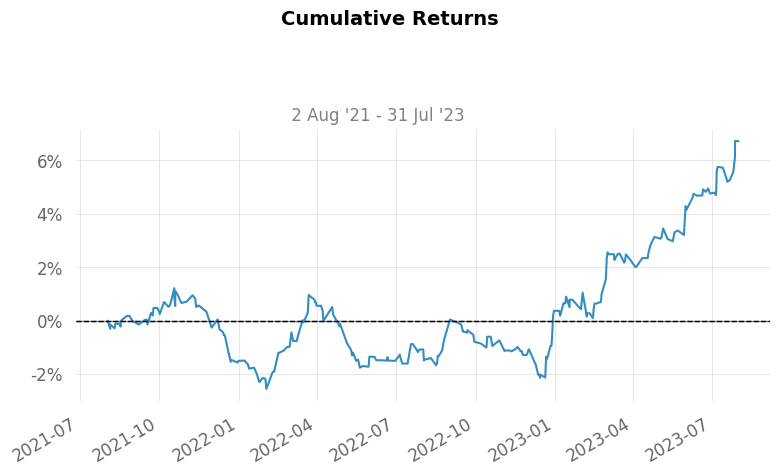

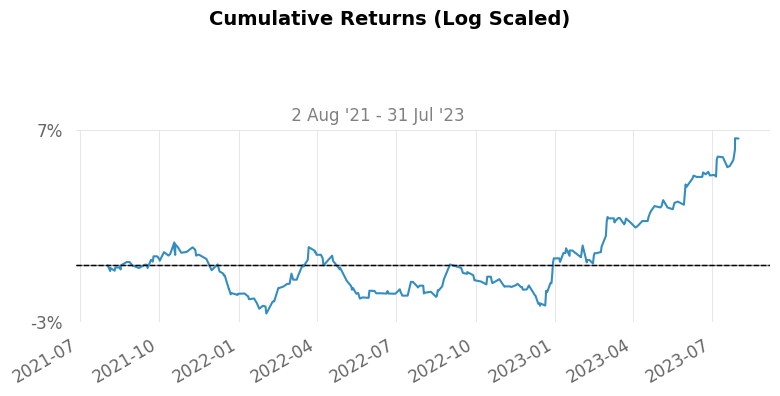

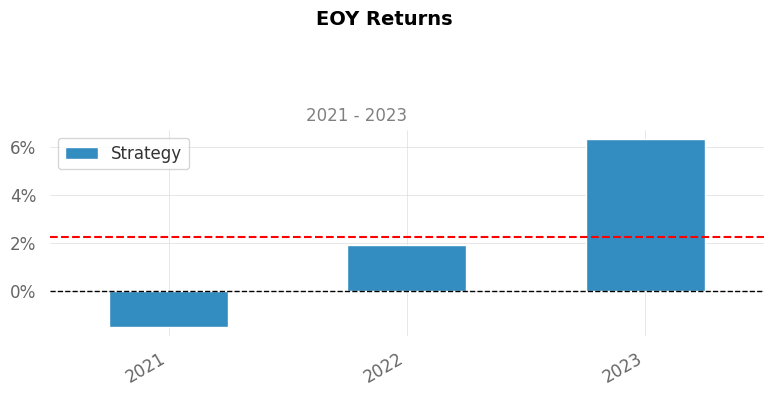

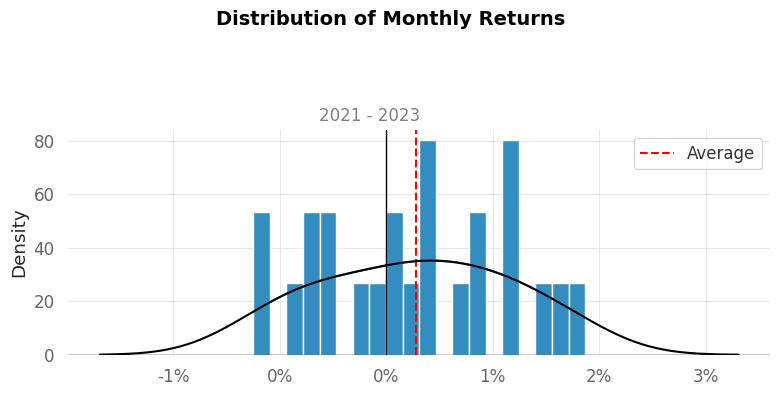

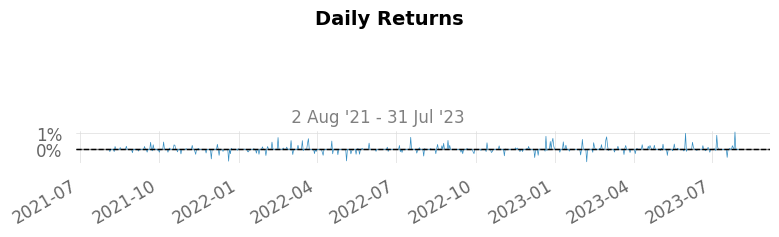

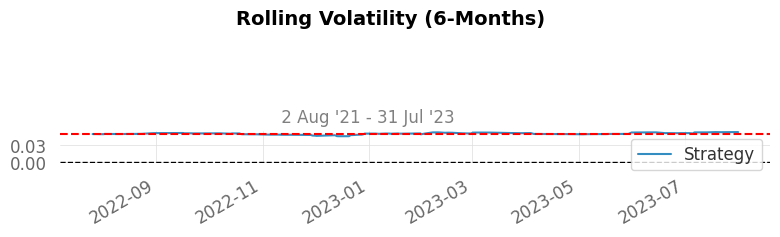

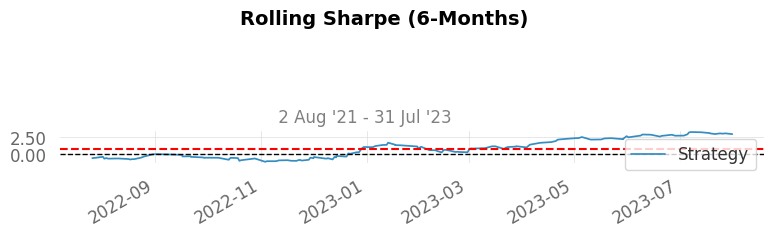

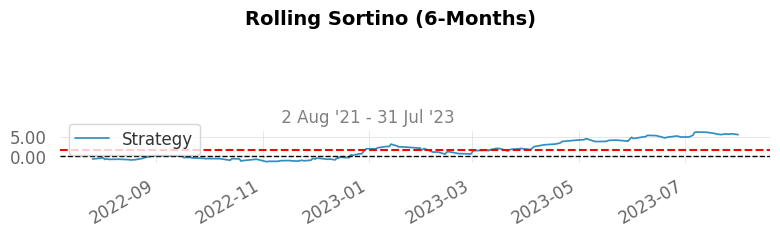

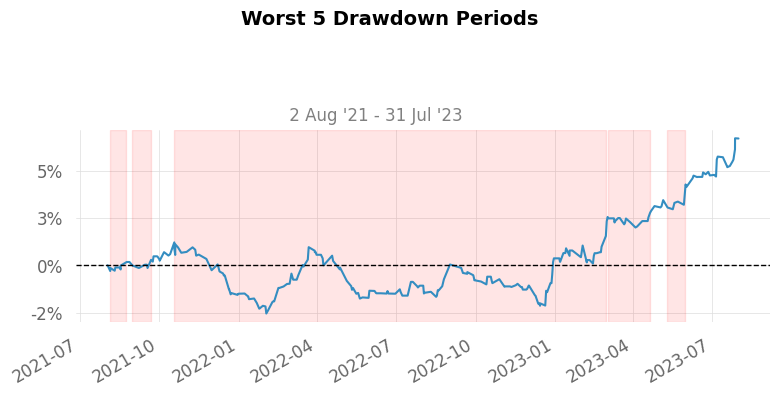

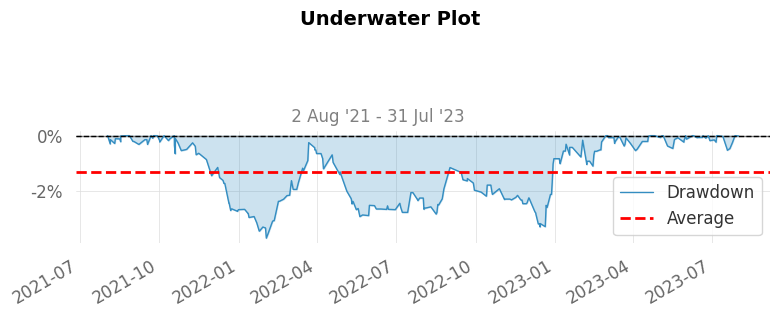

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


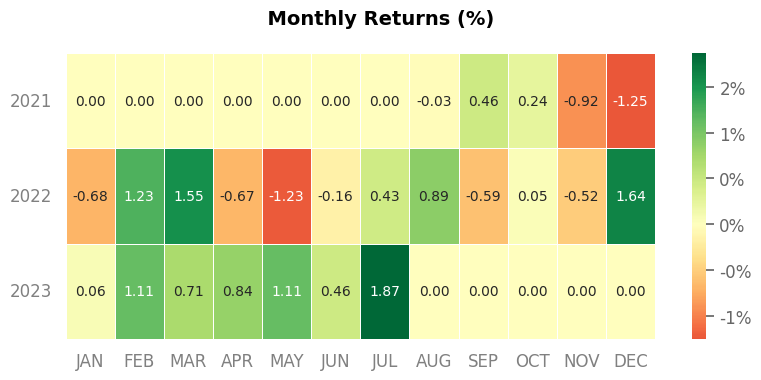

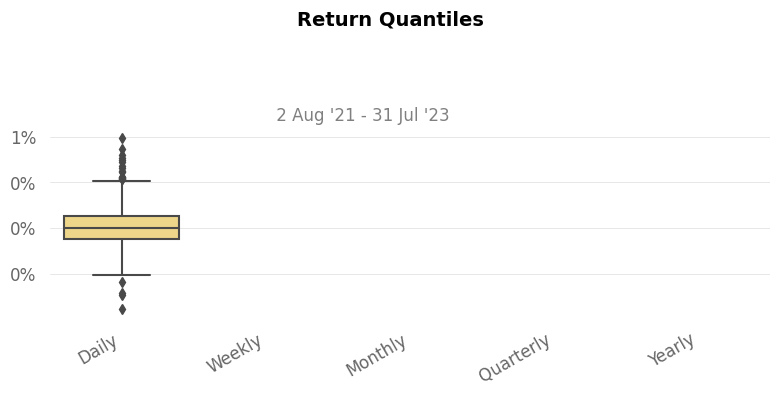

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [18]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=True )

### Order History

In [19]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)

+------------------+----------------------------------+
| Order ID         | 7375e7aea0394ce29adfefa84b635bcc |
| Transaction Type | SELL                             |
| Instrument       | NSE:AXISBANK                     |
| Quantity         | 3                                |
| Price            | ₹954.05                          |
+------------------+----------------------------------+
+-----------------------------+------------------------+
| timestamp_created           | state                  |
|-----------------------------+------------------------|
| 2023-10-23T13:43:55.999097Z | COMPLETE               |
| 2023-10-23T13:43:55.999080Z | OPEN                   |
| 2023-10-23T13:43:55.999062Z | OPEN PENDING           |
| 2023-10-23T13:43:55.999041Z | VALIDATION PENDING     |
| 2023-10-23T13:43:55.998977Z | PUT ORDER REQ RECEIVED |
+-----------------------------+------------------------+

+------------------+----------------------------------+
| Order ID         | f80c77d52e2c46b69

---

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 +0530', 
    end='15:00 +0530',  
    instruments='NSE:SBIN', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Paper Trading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

---